In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data_file = '../sample_lottery_data.csv'

df = pd.read_csv(data_file)

df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek

day_groups = {
    '周一': df[df['day_of_week'] == 0].copy(),
    '周三': df[df['day_of_week'] == 2].copy(),
    '周六': df[df['day_of_week'] == 5].copy()
}

# for day, group in day_groups.items():
#     print(f"{day}数据: {len(group)}条")

In [5]:
# 处理号码数据（将字符串转换为列表）
def extract_numbers(numbers_str):
    return [int(num.strip()) for num in numbers_str.strip('"').split(',')]

for day, group in day_groups.items():
    group['front_numbers_list'] = group['front_numbers'].apply(extract_numbers)
    group['back_numbers_list'] = group['back_numbers'].apply(extract_numbers)

# 分析每组的销售额统计
sales_stats = {day: {
    '平均值': group['total_sales'].mean(),
    '中位数': group['total_sales'].median(),
    '最大值': group['total_sales'].max(),
    '最小值': group['total_sales'].min(),
    '标准差': group['total_sales'].std(),
    '样本数': len(group)
} for day, group in day_groups.items()}

# 号码分布频率
def analyze_number_frequency(group_data, field_name, max_number):
    freq = {i: 0 for i in range(1, max_number + 1)}

    for _, row in group_data.iterrows():
        for num in row[field_name]:
            freq[num] += 1

    return freq

front_freq = {day: analyze_number_frequency(group, 'front_numbers_list', 35)
              for day, group in day_groups.items()}
back_freq = {day: analyze_number_frequency(group, 'back_numbers_list', 12)
             for day, group in day_groups.items()}

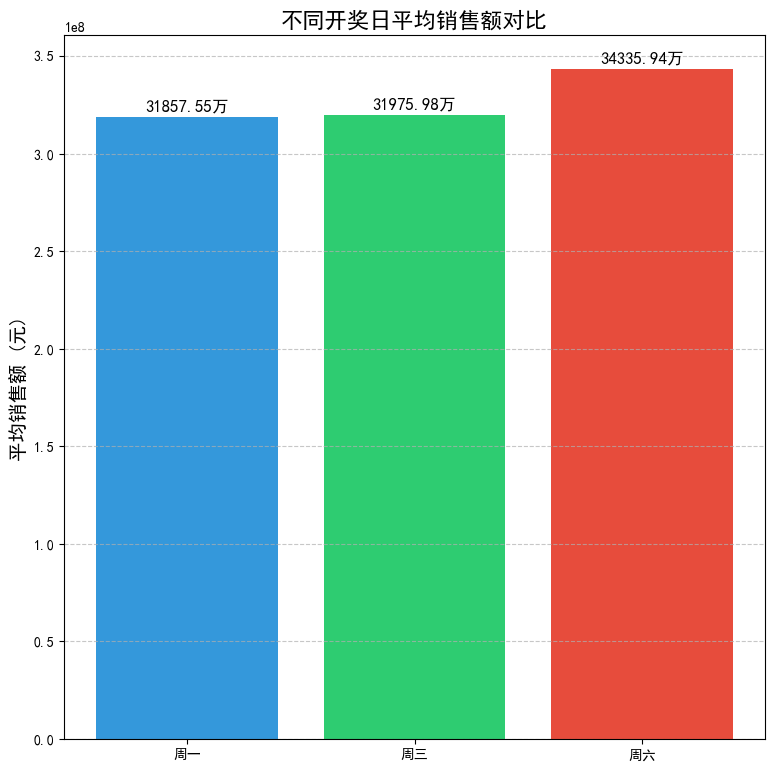

In [27]:
# 销售额均值对比
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
days = ['周一', '周三', '周六']
sales_means = [sales_stats[day]['平均值'] for day in days]
colors = ['#3498db', '#2ecc71', '#e74c3c']
plt.bar(days, sales_means, color=colors)
plt.title('不同开奖日平均销售额对比', fontsize=16)
plt.ylabel('平均销售额 (元)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(sales_means):
    plt.text(i, value + 3000000, f'{value/10000:.2f}万',
             ha='center', fontsize=12)
plt.tight_layout()

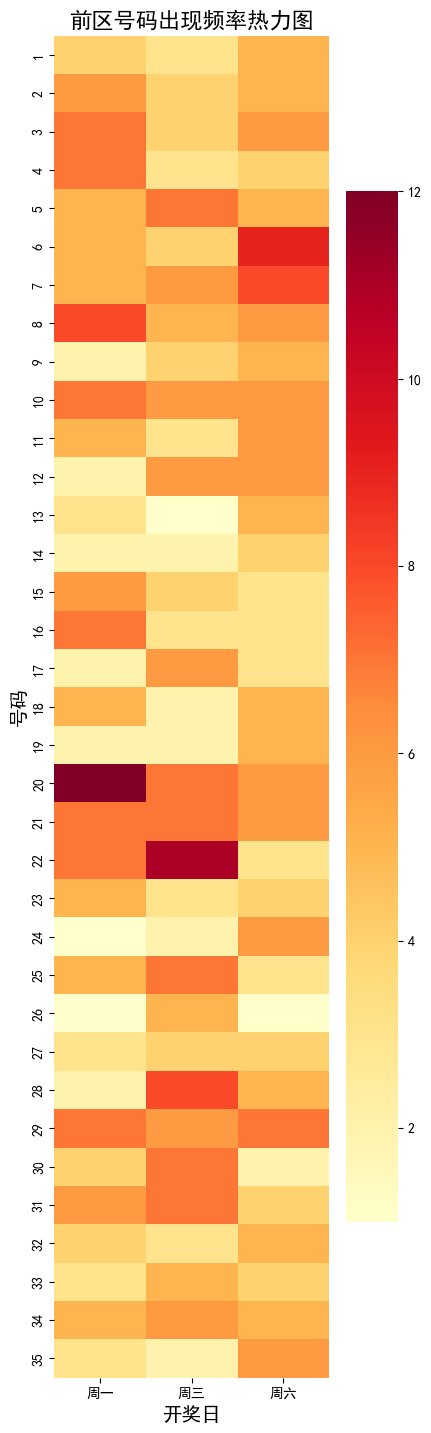

In [26]:
# 前区号码分布热力图
plt.figure(figsize=(8, 28))
plt.subplot(2, 2, 2)
front_data = pd.DataFrame({day: pd.Series(freq) for day, freq in front_freq.items()})
sns.heatmap(front_data, cmap='YlOrRd', annot=False)
plt.title('前区号码出现频率热力图', fontsize=16)
plt.xlabel('开奖日', fontsize=14)
plt.ylabel('号码', fontsize=14)
plt.tight_layout()

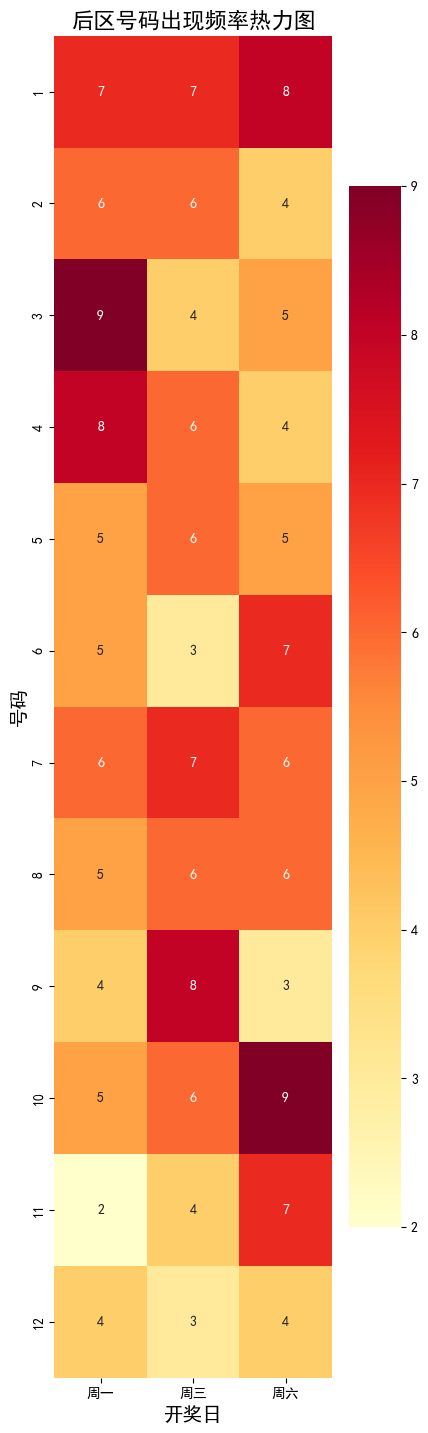

In [25]:
# 后区号码分布热力图
plt.figure(figsize=(8, 28))
plt.subplot(2, 2, 3)
back_data = pd.DataFrame({day: pd.Series(freq) for day, freq in back_freq.items()})
sns.heatmap(back_data, cmap='YlOrRd', annot=True, fmt='d')
plt.title('后区号码出现频率热力图', fontsize=16)
plt.xlabel('开奖日', fontsize=14)
plt.ylabel('号码', fontsize=14)
plt.tight_layout()

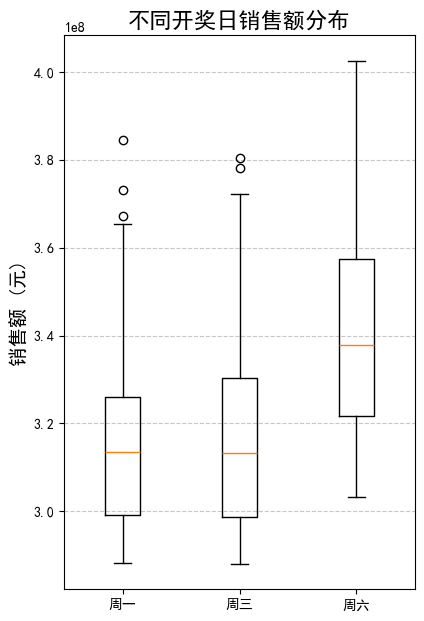

In [24]:
# 销售额箱线图
plt.figure(figsize=(8, 12))
plt.subplot(2, 2, 4)
sales_data = [group['total_sales'] for _, group in day_groups.items()]
plt.boxplot(sales_data, tick_labels=days)
plt.title('不同开奖日销售额分布', fontsize=16)
plt.ylabel('销售额 (元)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
# plt.savefig(output_image, dpi=300, bbox_inches='tight')